In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [72]:
df=pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')

In [73]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [74]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [75]:
#we have to perform some eda for logistic regression to work correctly
df2 = df.dropna(subset=['education'])
 # Now use df_no_missing_edu for your visualizations and chi-square test

In [76]:
from scipy.stats import pointbiserialr

# Assuming 'CHD' is coded as 0 and 1
correlation, p_value = pointbiserialr(df2['TenYearCHD'], df2['education'])

print(f"Point-Biserial Correlation: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

Point-Biserial Correlation: -0.05
P-value: 0.001


In [77]:
from scipy.stats import chi2_contingency
import pandas as pd

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['currentSmoker'], df['TenYearCHD']))

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
#current smoker removed because cigsPerday is enough for that

Chi-square statistic: 1.497705652757576
P-value: 0.2210247224594497


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [79]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Prepare the data
X = np.array(df['age']).reshape(-1, 1)  # Numerical feature
y = np.where(df['TenYearCHD'] == 1, 1, 0)  # Binary target (1 for 'yes', 0 for 'no')

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Check model coefficients
print(f"Coefficient: {model.coef_}")


Coefficient: [[0.07459601]]


In [80]:
import pandas as pd
import statsmodels.api as sm
df2=df.dropna(subset=['male'])
# Prepare your data
X = df2['male']  # Independent variable
y = df2['TenYearCHD']  # Dependent variable

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Get the summary which includes coefficients and p-values
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.422221
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4236
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                0.009084
Time:                        14:24:31   Log-Likelihood:                -1789.4
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 1.017e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9511      0.062    -31.675      0.000      -2.072      -1.830
male           0.4918      0.

In [81]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [82]:
df.male.value_counts()

male
0    2419
1    1819
Name: count, dtype: int64

In [83]:
df.drop('currentSmoker',axis=1,inplace=True)

In [84]:
df.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<Axes: xlabel='sysBP'>

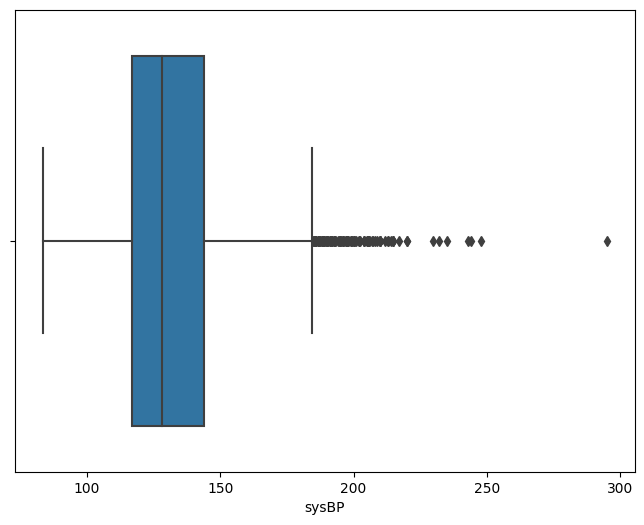

In [85]:
import seaborn as sns
plt.figure(figsize=(8, 6))

sns.boxplot(x=df['sysBP'])


In [86]:
Q1 = df['heartRate'].quantile(0.25)
Q3 = df['heartRate'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['heartRate'] = df['heartRate'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
df


,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [87]:
Q1 = df['cigsPerDay'].quantile(0.25)
Q3 = df['cigsPerDay'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['cigsPerDay'] = df['cigsPerDay'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

df


,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [88]:
Q1 = df['totChol'].quantile(0.25)
Q3 = df['totChol'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['totChol'] = df['totChol'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
df


,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [89]:
Q1 = df['sysBP'].quantile(0.25)
Q3 = df['sysBP'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['sysBP'] = df['sysBP'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
df


,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [90]:
Q1 = df['diaBP'].quantile(0.25)
Q3 = df['diaBP'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['diaBP'] = df['diaBP'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
df


,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [91]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['BMI'] = df['BMI'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
df


,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [92]:
Q1 = df['glucose'].quantile(0.25)
Q3 = df['glucose'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



# Cap the outliers
df['glucose'] = df['glucose'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
df

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [93]:
df3=pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')

In [94]:
df.isnull().sum()

male                 0
age                  0
education          105
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<Axes: xlabel='glucose'>

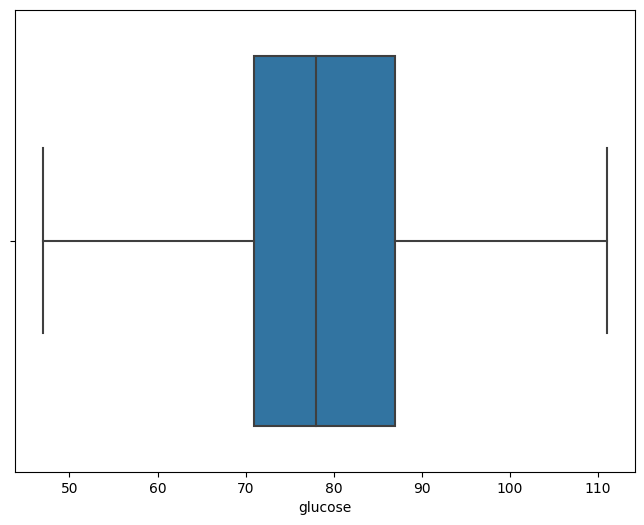

In [95]:
import seaborn as sns
plt.figure(figsize=(8, 6))

sns.boxplot(x=df['glucose'])

In [96]:
df.isnull().sum()

male                 0
age                  0
education          105
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [97]:
pd.crosstab(df.education,df.TenYearCHD)

TenYearCHD,0,1
education,,
1.0,1397,323
2.0,1106,147
3.0,599,88
4.0,403,70


In [98]:
df.loc[df['education'].isnull()].sample(10)

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1675,1,44,NaN,40.0,0.0,0,1,0,312.0,157.0,97.0,29.91,85.0,74.0,1
2060,1,38,NaN,0.0,0.0,0,0,0,221.0,119.0,84.0,26.89,66.0,82.0,0
1179,1,44,NaN,4.0,0.0,0,0,0,196.0,107.0,73.0,24.36,60.0,71.0,0
1654,0,51,NaN,20.0,0.0,0,0,0,168.0,128.0,80.0,23.08,75.0,93.0,0
782,1,48,NaN,0.0,0.0,0,1,0,202.0,138.0,96.0,27.97,68.0,85.0,0
2595,0,64,NaN,0.0,0.0,0,1,0,270.0,155.0,93.0,35.35,83.0,111.0,0
4098,1,37,NaN,20.0,0.0,0,0,0,184.0,113.0,81.0,22.16,85.0,63.0,0
1253,1,50,NaN,0.0,0.0,0,0,0,200.0,126.0,88.0,26.73,80.0,76.0,1
3673,1,48,NaN,50.0,0.0,0,0,0,232.0,136.0,81.0,25.83,80.0,78.0,0
819,0,43,NaN,20.0,0.0,0,0,0,276.0,127.5,85.0,25.09,85.0,74.0,0


In [99]:
mode_chd_1 = df[df['TenYearCHD'] == 1]['BPMeds'].mode()[0]

# Step 2: Calculate the mode of "education" for TenYearCHD == 0
mode_chd_0 = df[df['TenYearCHD'] == 0]['BPMeds'].mode()[0]

# Step 3: Fill null values based on the value of "TenYearCHD"
df['BPMeds'] = df.apply(
    lambda row: mode_chd_1 if pd.isnull(row['BPMeds']) and row['TenYearCHD'] == 1 
                else mode_chd_0 if pd.isnull(row['BPMeds']) and row['TenYearCHD'] == 0 
                else row['BPMeds'],
    axis=1
)

# Print the updated DataFrame
print(df)

      male  age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0        1   39        4.0         0.0     0.0                0             0   
1        0   46        2.0         0.0     0.0                0             0   
2        1   48        1.0        20.0     0.0                0             0   
3        0   61        3.0        30.0     0.0                0             1   
4        0   46        3.0        23.0     0.0                0             0   
...    ...  ...        ...         ...     ...              ...           ...   
4233     1   50        1.0         1.0     0.0                0             1   
4234     1   51        3.0        43.0     0.0                0             0   
4235     0   48        2.0        20.0     0.0                0             0   
4236     0   44        1.0        15.0     0.0                0             0   
4237     0   52        2.0         0.0     0.0                0             0   

      diabetes  totChol  sy

In [100]:
mode_chd_1 = df[df['TenYearCHD'] == 1]['education'].mode()[0]

# Step 2: Calculate the mode of "education" for TenYearCHD == 0
mode_chd_0 = df[df['TenYearCHD'] == 0]['education'].mode()[0]

# Step 3: Fill null values based on the value of "TenYearCHD"
df['education'] = df.apply(
    lambda row: mode_chd_1 if pd.isnull(row['education']) and row['TenYearCHD'] == 1 
                else mode_chd_0 if pd.isnull(row['education']) and row['TenYearCHD'] == 0 
                else row['education'],
    axis=1
)

# Print the updated DataFrame
print(df)

      male  age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0        1   39        4.0         0.0     0.0                0             0   
1        0   46        2.0         0.0     0.0                0             0   
2        1   48        1.0        20.0     0.0                0             0   
3        0   61        3.0        30.0     0.0                0             1   
4        0   46        3.0        23.0     0.0                0             0   
...    ...  ...        ...         ...     ...              ...           ...   
4233     1   50        1.0         1.0     0.0                0             1   
4234     1   51        3.0        43.0     0.0                0             0   
4235     0   48        2.0        20.0     0.0                0             0   
4236     0   44        1.0        15.0     0.0                0             0   
4237     0   52        2.0         0.0     0.0                0             0   

      diabetes  totChol  sy

In [101]:

# Calculate the mode for ages based on TenYearCHD
mode_age_chd_1 = df[df['TenYearCHD'] == 1]['glucose'].mean() # Mode of 'age' where TenYearCHD == 1
mode_age_chd_0 = df[df['TenYearCHD'] == 0]['glucose'].mean() # Mode of 'age' where TenYearCHD == 0

# Define a function to fill missing age based on TenYearCHD
def fill_age(row):
    if pd.isnull(row['glucose']):
        if row['TenYearCHD'] == 1:
            return mode_age_chd_1  # Fill with mode where TenYearCHD == 1
        else:
            return mode_age_chd_0  # Fill with mode where TenYearCHD == 0
    return row['glucose']

# Apply the function to fill missing ages
df['glucose'] = df.apply(fill_age, axis=1)

In [102]:

# Calculate the mode for ages based on TenYearCHD
mode_age_chd_1 = df[df['TenYearCHD'] == 1]['cigsPerDay'].mean() # Mode of 'age' where TenYearCHD == 1
mode_age_chd_0 = df[df['TenYearCHD'] == 0]['cigsPerDay'].mean() # Mode of 'age' where TenYearCHD == 0

# Define a function to fill missing age based on TenYearCHD
def fill_age(row):
    if pd.isnull(row['cigsPerDay']):
        if row['TenYearCHD'] == 1:
            return mode_age_chd_1  # Fill with mode where TenYearCHD == 1
        else:
            return mode_age_chd_0  # Fill with mode where TenYearCHD == 0
    return row['cigsPerDay']

# Apply the function to fill missing ages
df['cigsPerDay'] = df.apply(fill_age, axis=1)

In [103]:

# Calculate the mode for ages based on TenYearCHD
mode_age_chd_1 = df[df['TenYearCHD'] == 1]['totChol'].mean() # Mode of 'age' where TenYearCHD == 1
mode_age_chd_0 = df[df['TenYearCHD'] == 0]['totChol'].mean() # Mode of 'age' where TenYearCHD == 0

# Define a function to fill missing age based on TenYearCHD
def fill_age(row):
    if pd.isnull(row['totChol']):
        if row['TenYearCHD'] == 1:
            return mode_age_chd_1  # Fill with mode where TenYearCHD == 1
        else:
            return mode_age_chd_0  # Fill with mode where TenYearCHD == 0
    return row['totChol']

# Apply the function to fill missing ages
df['totChol'] = df.apply(fill_age, axis=1)

In [104]:

# Calculate the mode for ages based on TenYearCHD
mode_age_chd_1 = df[df['TenYearCHD'] == 1]['BMI'].mean() # Mode of 'age' where TenYearCHD == 1
mode_age_chd_0 = df[df['TenYearCHD'] == 0]['BMI'].mean() # Mode of 'age' where TenYearCHD == 0

# Define a function to fill missing age based on TenYearCHD
def fill_age(row):
    if pd.isnull(row['BMI']):
        if row['TenYearCHD'] == 1:
            return mode_age_chd_1  # Fill with mode where TenYearCHD == 1
        else:
            return mode_age_chd_0  # Fill with mode where TenYearCHD == 0
    return row['BMI']

# Apply the function to fill missing ages
df['BMI'] = df.apply(fill_age, axis=1)

In [105]:

# Calculate the mode for ages based on TenYearCHD
mode_age_chd_1 = df[df['TenYearCHD'] == 1]['heartRate'].mean() # Mode of 'age' where TenYearCHD == 1
mode_age_chd_0 = df[df['TenYearCHD'] == 0]['heartRate'].mean() # Mode of 'age' where TenYearCHD == 0

# Define a function to fill missing age based on TenYearCHD
def fill_age(row):
    if pd.isnull(row['heartRate']):
        if row['TenYearCHD'] == 1:
            return mode_age_chd_1  # Fill with mode where TenYearCHD == 1
        else:
            return mode_age_chd_0  # Fill with mode where TenYearCHD == 0
    return row['heartRate']

# Apply the function to fill missing ages
df['heartRate'] = df.apply(fill_age, axis=1)

In [107]:
# Access data from the first row (position 0)
first_row = df.iloc[3470]
print(first_row)


male                 0.00
age                 62.00
education            1.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         1.00
diabetes             0.00
totChol            282.00
sysBP              175.00
diaBP               79.00
BMI                 28.24
heartRate           57.00
glucose             67.00
TenYearCHD           0.00
Name: 3470, dtype: float64


In [108]:
df.isnull().sum()

male               0
age                0
education          0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [109]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer



# Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df['age'] = pt.fit_transform(df[['age']])


# Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df['cigsPerDay'] = pt.fit_transform(df[['cigsPerDay']])



# Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df['totChol'] = pt.fit_transform(df[['totChol']])


# Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df['sysBP'] = pt.fit_transform(df[['sysBP']])


# Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df['diaBP'] = pt.fit_transform(df[['diaBP']])

# Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df['BMI'] = pt.fit_transform(df[['BMI']])

# Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df['heartRate'] = pt.fit_transform(df[['heartRate']])



# Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df['glucose'] = pt.fit_transform(df[['glucose']])




In [110]:
df.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,-1.294113,4.0,-0.947546,0.0,0,0,0,-0.976723,-1.462512,-1.153442,0.402818,0.432990,-0.152172,0
1,0,-0.351728,2.0,-0.947546,0.0,0,0,0,0.381481,-0.442829,-0.082826,0.831950,1.559432,-0.239980,0
2,1,-0.106949,1.0,1.147064,0.0,0,0,0,0.267341,-0.075336,-0.173655,-0.022479,0.010386,-0.799603,0
3,0,1.285028,3.0,1.324268,0.0,0,1,0,-0.206478,0.951057,1.077912,0.796499,-0.925654,1.722908,1
4,0,-0.351728,3.0,1.209610,0.0,0,0,0,1.138240,0.056236,0.182766,-0.657617,0.830191,0.501763,0


In [111]:
from scipy.stats import skew

# Calculate skewness
skewness = skew(df['age'])
print(f"Skewness: {skewness}")


Skewness: -0.002983025103783287


In [112]:

# Count total duplicates
total_duplicates = df.duplicated().sum()
print(f"Total duplicates: {total_duplicates}")


Total duplicates: 0


In [113]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
)
import matplotlib.pyplot as plt


In [114]:
X = df[['male', 'age','education','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]  # Features
y = df['TenYearCHD'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the model
log_reg = LogisticRegression(max_iter=1000)

# Define the parameter grid
param_grid = [{
    'C': np.logspace(-6, 4, 20),  # Regularization strength
    'solver': ['lbfgs','newton-cg','liblinear','sag', 'saga'],  # Algorithm to use for optimization
    'penalty': ['l1', 'l2','elasticnet'],  # Regularization type
    'max_iter':[100,1000,2500,5000]
}]

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, 
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)


Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Assuming y_test and y_pred are already defined
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Printing the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Confusion Matrix:
[[720   4]
 [118   6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.05      0.09       124

    accuracy                           0.86       848
   macro avg       0.73      0.52      0.51       848
weighted avg       0.82      0.86      0.80       848

Accuracy: 0.8561
Precision: 0.6000
Recall: 0.0484
F1 Score: 0.0896
ROC AUC Score: 0.5214


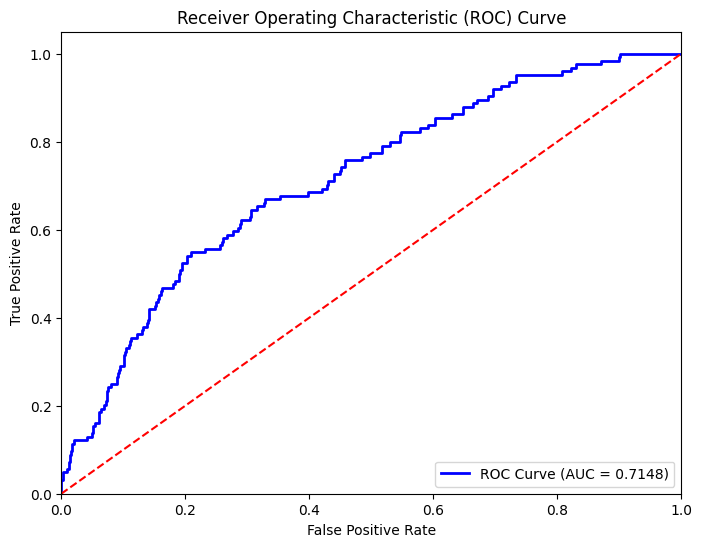

In [116]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_value:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [117]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
for idx in sorted_indices:
    print(f"{X_train.columns[idx]}: {importances[idx]}")
#higher the value, more importance it has on reducing the error during prediction, their sum is 1

age: 0.12918814381451574
sysBP: 0.1282378099392047
BMI: 0.12822528106532954
totChol: 0.12160495890526814
glucose: 0.1198934932455996
diaBP: 0.11789731196567368
heartRate: 0.10150154722754134
cigsPerDay: 0.061336796613013715
education: 0.035473213023572314
male: 0.019883215577358317
prevalentHyp: 0.017541137734888607
diabetes: 0.007565287531740226
BPMeds: 0.007082662637964337
prevalentStroke: 0.004569140718330007


In [118]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_
for i, coef in enumerate(coefficients[0]):
    print(f"{X_train.columns[i]}: {coef}")
#higher value has higher importance (if their value go up the probability of target value reaching a certain value goes up) negative-0 positive-1

male: 0.4671669009606151
age: 0.6033690503247451
education: 0.03266595686323582
cigsPerDay: 0.242094434044548
BPMeds: 0.3374992297580549
prevalentStroke: 0.7675584550436921
prevalentHyp: 0.2616688425801316
diabetes: 0.63730119320101
totChol: 0.04236517930013357
sysBP: 0.297104336254537
diaBP: -0.004272683221253494
BMI: -0.0257228439683013
heartRate: -0.04632098978419272
glucose: 0.06376578707391777
